# **Home Work Assignment #5**
                                                                                
## ***Doppler shifts in NGC300***

##### Author : Spencer Long  
##### Class: Astro 320 Spectroscopy

---
---
---

# Working With The Data:

### Imports:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from astropy.io import fits
from astropy import units as u

- - - 

### Accessing Fits File Data:

In [2]:
hdul = fits.open('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/3.N300.fits')

HIERARCHESO OBS TPLNO       =            3 / Template number within OB           [astropy.io.fits.card]


In [3]:
manual = hdul[0].header # Assgining variable to call header data of fits file

In [4]:
data = hdul[0].data # Storing Flux density data into memory (will be used for our y axis)

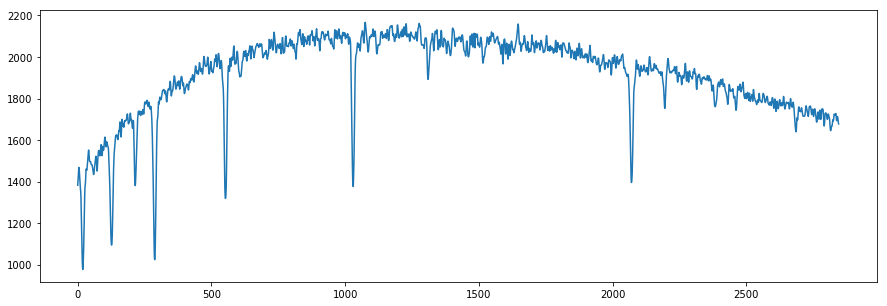

In [5]:
plt.figure(figsize=(15,5))
plt.plot(data) # Plotting flux data to take a quick look. 

---

### Needed Labels & Data to Perform Tasks:

In [6]:
# Balmer line labels for plots and dataframe
balmer_lines = [ 
                r'$H\beta$',
                r'$H\gamma$',
                r'$H\delta$',
                r'$H\epsilon$',
                r'$H8$',
                r'$H9$'
               ] 

# Wavelengths for Balmer lines
wl = [
      4861.33,
      4340.47,
      4101.74,
      3970.07,
      3889.05,
      3835.39
     ]  

# Index labels for dataframe
indexx = [
          "Rest Wavelength" r'$(Angstroms)$' ,
          "Doppler Velocity" r'$(\frac{km}{s})$',
          'Central Wavelength' r'$(Angstroms)$', 
          'Equivalent Widths' r'$(Angstroms)$'
         ] 

---
### Creating The X Axis:

 The two methods used for finding x below output the same array but provide two different methods of how to create our x axis arrays.  
 
 **Note:** The second x is not transferable across all fits files as sometimes the data stored in the variables are not always under the 
 the same variable names thus the reason for providing you with the first method of creating our x axis array. All data to create the x
 axis was extracted from the header of the fits file. 

In [7]:
x = np.arange(4538.5,len(data)*0.5+4538.5,0.5) # first method 

x = np.arange(manual['CRVAL1A'], len(data) * manual['CDELT1A'] + manual['CRVAL1A'], manual['CDELT1A']) # second method

data.shape == x.shape # This line of code verifies that the x axis array is the same shape as the y axis array.

True

---

### Becoming Aware of Our Shift: 

Now that we have created an x axis and y axis array lets plot them and apply a vertical line at one of our balmer line wavelengths to get an idea of how shifted our data is due to the doppler effect. As you can see below from the orange line our data is shifted due to the doppler effect.

**Note:** The shift used is calculated later on in this script but has been used here to show just how shifted our data is.

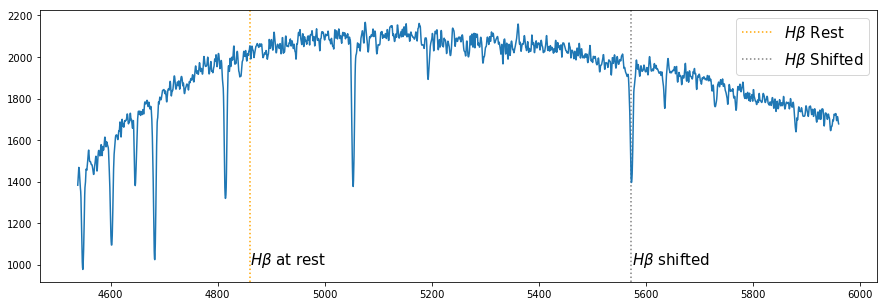

In [8]:
shift = 712.5

plt.figure(figsize=(15,5))
plt.axvline(x=4861, color = 'orange', label = r'$H\beta$' ' Rest', ls=':') # Where H_Beta is normally located at rest
plt.axvline(x=4861 + shift, color = 'grey', label = r'$H\beta$' ' Shifted', ls=':') # Where H_Beta is located due to doppler shift
plt.annotate(balmer_lines[0] + ' at rest', xy=(wl[0],1200), xytext=(wl[0],1000), fontsize=15)
plt.annotate(balmer_lines[0] + ' shifted', xy=(wl[0],1200), xytext=(wl[0]+shift,1000), fontsize=15)

plt.legend(loc=0, fontsize=15) # creates legend on plot and places in designated location
plt.plot(x, data) # plotting our created x and y arrays together

---

# The Doppler Effect: 

We will now create some functions to calculate the velocity, wavelength, and shift of our data.

**Sources:**  
1. http://astro.unl.edu/naap/esp/dopplereffect.html  
1. https://en.wikipedia.org/wiki/Doppler_effect

In [9]:
# Calculates the velocity of the object in question

def doppler_velocity(lambda_rest, lambda_shift):
    
    speed_light = 299792.458*u.kilometer*u.second**-1 # Speed of light in km/s (Source: Comptes Rendus de la 17e CGPM (1983), 1984, p.97) 
    lr = lambda_rest * u.angstrom
    ls = lambda_shift * u.angstrom
    velocity = ((ls -lr) / (lr)) * speed_light
    
    return velocity    

In [10]:
# Calculates the current wavelength of the line in question

def doppler_wavelength(wavelength_rest, velocity):
    
    vel = velocity * u.kilometer*u.second**-1
    speed_light = 299792.458*u.kilometer*u.second**-1 # Speed of light (Source: Comptes Rendus de la 17e CGPM (1983), 1984, p.97)
    lamda_rest = wavelength_rest * u.angstrom # rest wave length of line in question
    
    lambda_shift = ((vel / speed_light) +1) * lamda_rest
    
    return lambda_shift

In [11]:
# Calculates the overall shift due to the doppler effect

def doppler_shift(rest_wavelength, current_wavelength):
    
    shift = abs(rest_wavelength - current_wavelength)
    
    return shift

---

### Calculations:

Now we will calculate the velocity, the current wavelength, and the shift of our $H\beta$ line: 

In [12]:
# Velocity

doppler_velocity(4861.33, 5573.5)

<Quantity 43918.67962345 km / s>

In [13]:
# Current wavelength of H_Beta

doppler_wavelength(4861.33,43918.68)

<Quantity 5573.50000611 Angstrom>

In [14]:
# Calculating the shift of our spectra due to the doppler effect

shift = doppler_shift(4861, 5573.5)
shift

712.5

---

### Applying Doppler Shift to Data:

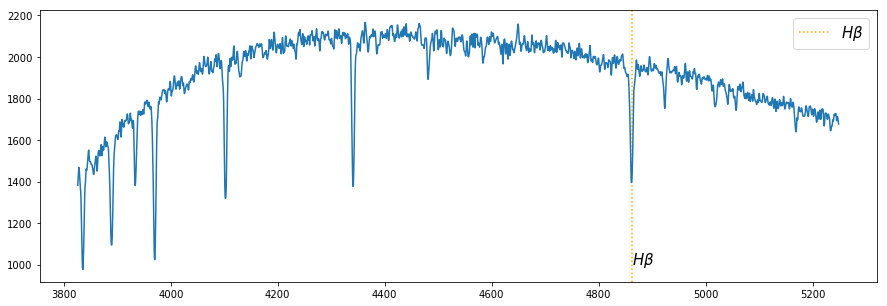

In [15]:
# Applying the doppler shift to our x axis (in this case we calculated the shift above to be 712.5 angstroms)
x = np.arange(4538.5-shift, len(data)*0.5+4538.5-shift, 0.5)

plt.figure(figsize = (15, 5))
plt.axvline(x = wl[0], color = 'orange', label = r'$H\beta$', ls = ':')# H_Beta line at rest. As we can see it lines up where it should be.
plt.annotate(balmer_lines[0], xy=(wl[0],1200), xytext=(wl[0],1000), fontsize=15)
plt.legend(loc = 0, fontsize=15)
plt.plot(x, data)

---

# Identifying The Balmer Lines:

Now that we have applied the doppler shift to our data we can identify lines by their resting wavelengths.

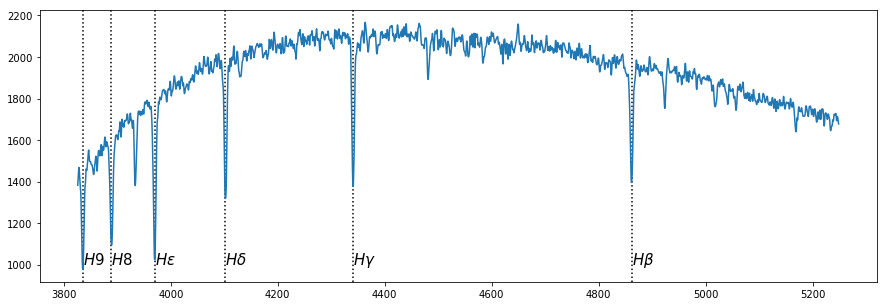

In [16]:
plt.figure(figsize=(15,5))

# Identifying lines by resting wave length and plotting a vertical line that is annotated  
for i in range(len(balmer_lines)):
    
    plt.axvline(x = wl[i], color = 'k', ls=':')
    plt.annotate(balmer_lines[i], xy=(wl[i],1200), xytext=(wl[i],1000), fontsize=15)

plt.plot(x,data)
plt.show()

---

# Creating Our Data Table For The Balmer Lines:

In [17]:
# Central wavelength that was calculated using Pyraf's splot feature with a gaussian fit for each Balmer line   
cwl = [4862.85, 4342.26, 4103.82, 3971.25, 3890.72, 3836.94]

# Equivalent width that was calculated using Pyraf's splot feature with a gaussian fit for each Balmer line   
eqw = [2.130, 1.799, 1.773, 2.279, 2.042, 1.726]

v = [] # Empty list for the calculated velocities to be appended to for dataframe

# For loop that calculates the velocity of each Balmer line using our doppler velocity function we created earlier
for i in range(0,len(wl)):
    velocity = doppler_velocity(wl[i],cwl[i]) 
    v.append(velocity)

# Creating a dataframe to place all of our calculated data for each individual Balmer line. 
df = pd.DataFrame(data=[wl,v,cwl,eqw], index=indexx, columns=balmer_lines)
df

,$H\beta$,$H\gamma$,$H\delta$,$H\epsilon$,$H8$,$H9$
Rest Wavelength$(Angstroms)$,4861.33,4340.47,4101.74,3970.07,3889.05,3835.39
Doppler Velocity$(\frac{km}{s})$,93.73659804212652 km / s,123.6337308678528 km / s,152.02531429100287 km / s,89.10550706661365 km / s,128.7341136935461 km / s,121.15542614963654 km / s
Central Wavelength$(Angstroms)$,4862.85,4342.26,4103.82,3971.25,3890.72,3836.94
Equivalent Widths$(Angstroms)$,2.13,1.799,1.773,2.279,2.042,1.726


---

# Why Should We Beware of The $H\epsilon$ Line?

In spectra, the H-epsilon line (transition 7→2) is often mixed in with another absorption line caused by ionized calcium known by astronomers as "$H$" (the original designation given by Fraunhofer). That is, H-epsilon's wavelength is very close to CaH at 396.847 nm, and cannot be resolved in low resolution types of spectra.

Source: https://wikivisually.com/wiki/Balmer_series